In [5]:
import networkx as nx
from os import walk
import re
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacymoji import Emoji
from scipy.optimize import curve_fit

In [79]:
nlp = spacy.load('it_core_news_sm')
nlp.add_pipe("emoji", first=True)

Function for NLP pipeline

In [80]:
articles = ["il","lo","la","i","gli","le"]
stopw = [" ",""]
pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
euro=['€', '€o']

In [81]:
def clean_text(text):
    text = text.replace('\n','')
    text = text.replace('€',' euro ')
    text = text.replace('€o',' euro ')
    doc = nlp(text.lower())

    bog = []

    for token in doc:

        # filter stopwords
        if not token.is_stop:
            # filter punctiation
            if not token.is_punct:
                if not token.like_url:
                    if not token.like_email:
                        if not token.is_space:
                            if token.lemma_ not in ['\n', ' ']:
                                # filter words used to search for tweets  
                                if not token._.is_emoji:
                                    #token.lemma_ = "[emoji]"
                                    #if str(token) not in search_words:
                                    if str(token) not in articles:
                                        if str(token) not in stopw:
                                            if(token.pos_ in pos_tag):
                                                if '' in str(token):
                                                    sep = ' '
                                                    stripped = token.lemma_.split(sep, 1)[0]
                                                    bog.append(re.sub('@', '',stripped))
                                                else:
                                                    bog.append(re.sub('@', '',token.lemma_))

    
    return bog

In [82]:
fra = 'impegnarci'
vex =clean_text(fra)
vex

['impegnare']

Append in list 'documents' all the txt files you wish to use (e.g. all influencers, only salvini etc.)

In [83]:
documents=[]
'''filenames = next(walk("video_data/text_all/Influencers"), (None, None, []))[2]
#filenames = next(walk("video_data/text/Politicians/Calenda"), (None, None, []))[2]
#filenames
for name in filenames:
    f = open("video_data/text_all/Influencers/{}".format(name),"r")
    #f = open("video_data/text/Politicians/Calenda/{}".format(name),"r")
    documents.append(list(csv.reader(f, delimiter=" "))[0])
    f.close()'''

filenames = next(walk("video_data/text_all/Influencers"), (None, None, []))[2]
for name in filenames:
    print("filename:",name)
    #f = open("video_data/text/Influencers/{}".format(name),"r")
    f = open("video_data/text_all/Influencers/{}".format(name),"r")
    documents.append(list(csv.reader(f, delimiter=" "))[0])
    f.close()
documents

filename: sonomelaidi_vid_7125792386235649286.txt
filename: Torcha__vid_7142902157740625157.txt
filename: mastrohh_vid_7141044104141573381.txt
filename: Flavia_Carlini_vid_7131024449918291206.txt
filename: Ilpuntoeconomico_vid_7133517495788473605.txt
filename: Torcha__vid_7147577244192394502.txt
filename: will_ita_vid_7137568539224968453.txt
filename: manueltuziofficial_vid_7143301342306569477.txt
filename: telospiegasofia_vid_7140268654771375366.txt
filename: Torcha__vid_7146270357580680454.txt
filename: sflend_vid_7142561037785533701.txt
filename: Torcha__vid_7136168078316031238.txt
filename: Luca_Carabetta_vid_7132747555355528453.txt
filename: Flavia_Carlini_vid_7131789807008681221.txt
filename: dotthygge_vid_7144368318491692293.txt
filename: ilpetro_vid_7135807530718022917.txt
filename: Flavia_Carlini_vid_7134978473549991173.txt
filename: will_ita_vid_7139898312550845702.txt
filename: Skuola.net_vid_7145477516109581573.txt
filename: Arianna_Biella_vid_7140954969871600901.txt
filena

[['siamo',
  "nell'epoca",
  'delle',
  'passioni',
  'tristi',
  'gli',
  'stipendi',
  'non',
  'pagano',
  'il',
  'costo',
  'della',
  'vita',
  'crolla',
  "nell'insegnamento",
  'degli',
  'adulti',
  'che',
  'da',
  'bambini',
  'ci',
  'dicevano',
  'gli',
  'sforzi',
  'ripagano',
  'sempre',
  'la',
  'realtà',
  'diventa',
  'sempre',
  'più',
  'veloce',
  'i',
  'rapporti',
  'sempre',
  'più',
  'fragili',
  'e',
  'cambiamenti',
  'climatici',
  'ci',
  'danno',
  'il',
  'colpo',
  'di',
  'grazia',
  'mettendoci',
  'di',
  'fronte',
  'ad',
  'una',
  'realtà',
  'catastrofiche',
  'inesorabili',
  'che',
  'ci',
  'fa',
  'sentire',
  'impotenti',
  'perché',
  'da',
  'soli',
  'non',
  'possiamo',
  'cambiarla',
  'però',
  'più',
  'giovani',
  'si',
  'sentono',
  'abbandonati',
  'da',
  'adulti',
  'che',
  'agiscono',
  'soltanto',
  'in',
  'relazione',
  'ai',
  'soldi',
  'e',
  'spendono',
  'due',
  'parole',
  'sul',
  'disagio',
  'giovanile',
  'solt

In [84]:
for i in range(len(documents)):
    documents[i] = clean_text(' '.join(documents[i]))
print(documents,"len:",len(documents))

[['epoca', 'passione', 'triste', 'stipendio', 'pagare', 'costo', 'crolla', 'insegnamento', 'adulto', 'bambino', 'dicevare', 'sforzo', 'ripagare', 'realtà', 'veloce', 'rapporto', 'fragile', 'cambiamento', 'climatico', 'dare', 'colpo', 'grazia', 'mettendoce', 'fronte', 'realtà', 'catastrofico', 'inesorabile', 'sentire', 'impotento', 'solo', 'cambiare', 'giovane', 'sentire', 'abbandonare', 'adulto', 'agire', 'relazione', 'soldo', 'spendere', 'parola', 'disagio', 'giovanile', 'vista', 'elezione', 'propaganda', 'fonte', 'incertezza', 'ansia', 'paura', 'giovane', 'nickyrito', 'ricercano', 'fonte', 'svago', 'temporaneo', 'finere', 'estraniare', 'realtà', 'passare', 'mente', 'spengere', 'schermo', 'chiedere', 'giovane', 'passato', 'aspettare', 'rispondere', 'auto', 'volniee', 'entusiasmo', 'tipico', 'voglia', 'conoscere', 'succedere', 'domanda', 'giovane', 'buono', 'probabilità', 'sentire', 'vedere', 'perdere', 'fiducia', 'confronto', 'apparire', 'disgregato', 'incerto', 'riporre', 'sogno', 'r

Build a dictionary of unique words.

In [85]:
voc = []
for doc in documents:
    for x in doc:
        voc.append(x)
voc, word_count = np.unique(voc, return_counts=True)
print(voc)
print(word_count)
tot_words = sum(word_count)

['Act' 'America' 'Andrea' ... 'zio' 'zitto' 'zona']
[1 1 1 ... 1 1 1]


Apply a thrshold on edges with only 1 occurence to remove noise

In [86]:
print(len(voc))
voc = voc[word_count > 1]
print(len(voc))

2568
1026


### NETWORK BUILDING
#### Networkx

Check for each couple of tokens the number of times they appear in the same document and use it (ore some metric tbd) as the weight of the edge.
Build adjacency matrix

In [87]:
adj = np.zeros((len(voc),len(voc)))
for i in range(len(voc)):
    for j in range(i+1,len(voc)):
        for doc in documents:
            if ((voc[i] in doc) and (voc[j] in doc)):
                adj[i,j] += 1

print(adj.max())
adj = adj/adj.max()
#adj

20.0


Run this cell to build dictionary to pass to NetworkX

In [88]:
adj_dic = {}
for i in range(len(voc)-1):
    dic_i = {}
    for j in range(i+1,len(voc)):
        if adj[i,j] != 0.:
            dic_i[voc[j]] = {"weight":adj[i,j]}
    adj_dic[voc[i]] = dic_i

you can represent the adjacency matrix but it's not very nice

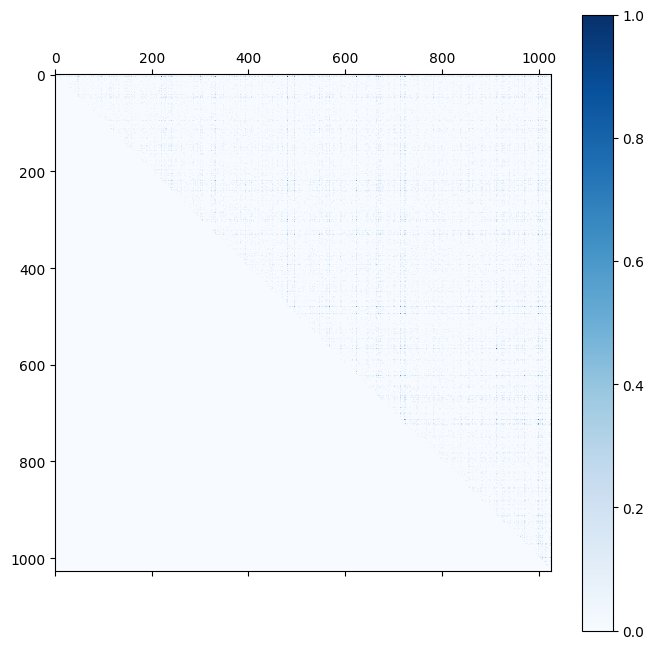

In [89]:
fig, ax = plt.subplots(figsize=(8,8))

cax = ax.matshow(adj, cmap='Blues')
fig.colorbar(cax)

### Assortativity
#### Help me check if I was doing things right pls, I was a bit rushed
Here we build the _degree correlation matrix_

893


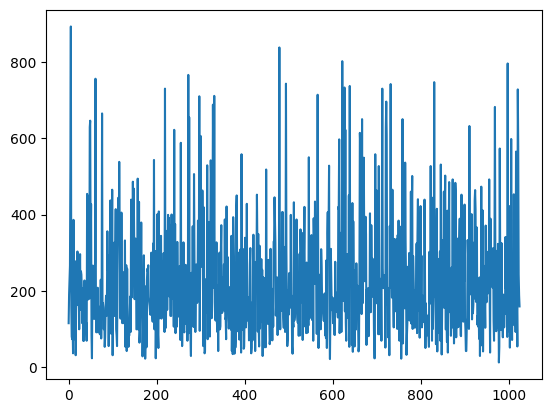

In [90]:
node_deg = np.zeros(len(voc), dtype=int)
for i in range(len(voc)):
    for j in range(len(voc)):
        if (adj[i,j] > 0): 
            node_deg[i] += 1
            node_deg[j] += 1
print(np.max(node_deg))
plt.plot(node_deg)

In [91]:
N = 40
deg_matr = np.zeros((N,N))
deg_matr_full = np.zeros((np.max(node_deg)+1,np.max(node_deg)+1))
step = np.max(node_deg)/N
for i in range(len(voc)):
    for j in range(len(voc)):
        if (adj[i,j] > 0):
            for g in range(N):
                if ((node_deg[i] < (g+1)*step) and (node_deg[i] > (g)*step)):
                    for r in range(N):
                        if ((node_deg[j] < (r+1)*step) and (node_deg[j] > (r)*step)):
                            deg_matr[g,r] += 1
                            break
                    break
            deg_matr_full[node_deg[i],node_deg[j]] += 1
deg_matr = deg_matr/deg_matr.max()

We can show the matrix, I blurred it to 40x40 for readability, this is already a measure of assortativity

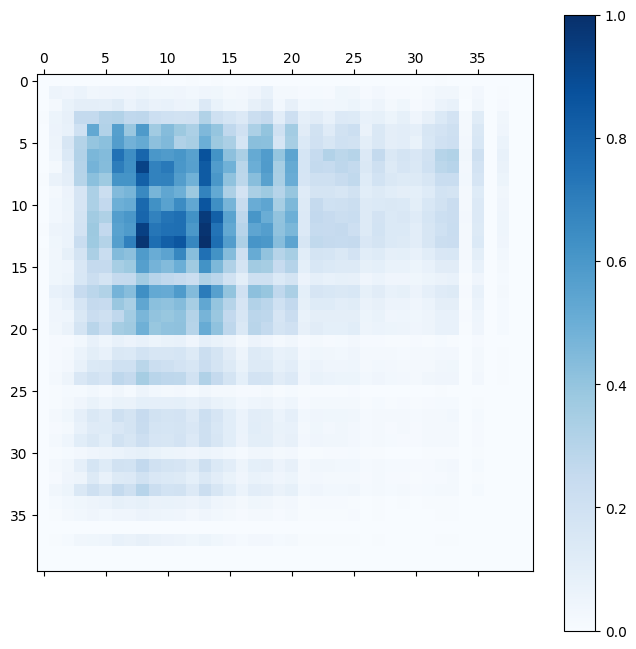

In [92]:
fig, ax = plt.subplots(figsize=(8,8))

cax = ax.matshow(deg_matr, cmap='Blues')
fig.colorbar(cax)

Now we plot the _average neighbour degree_.

This is more interesting and can help us comment the networks a bit more.

Pls check the correctness of this as well.

In [93]:
neigh_deg = np.zeros(len(voc))
for i in range(len(voc)):
    neig = 0
    for j in range(len(voc)):
        if (adj[i,j] > 0):
            neig+=1
            neigh_deg[i] += node_deg[j]
    if (neig != 0):
        neigh_deg[i] = neigh_deg[i]/neig

In [94]:
x_deg = np.unique(node_deg)
avg_neig_deg = np.zeros(len(x_deg))
for i in range(len(x_deg)):
    avg_neig_deg[i] = np.mean(neigh_deg[node_deg == x_deg[i]])
    if (avg_neig_deg[i] == 0.):
        avg_neig_deg[i] = 0.1

Perform fit to extract $\mu$

In [95]:
def f(x,mu,a):
    return(a + mu*x)
y_fit = np.log(avg_neig_deg)
x_fit = np.log(x_deg)
popt1, pcov1 = curve_fit(f,x_fit,y_fit)

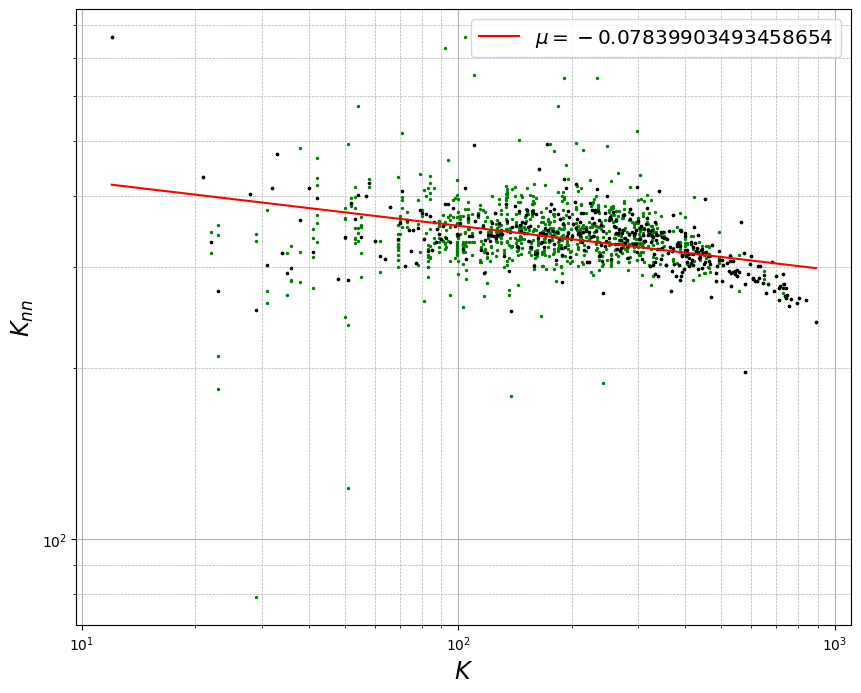

In [96]:
plt.figure(figsize=(10,8))
plt.plot(node_deg,neigh_deg,color="green", ms=2.9, marker='.',linestyle = 'None')
plt.plot(x_deg,avg_neig_deg,color='black', ms=3.2, marker='.',linestyle = 'None')
plt.plot(x_deg,np.exp(f(x_fit,popt1[0],popt1[1])), color='red', label='$\mu = {}$'.format(popt1[0]))
plt.xlabel('$K$', fontsize='xx-large')
plt.ylabel('$K_{nn}$', fontsize='xx-large')
plt.xscale('log')
plt.yscale('log')
plt.grid(which='minor', ls='--', lw=0.5)
plt.grid(which='major')
plt.legend(fontsize='x-large')
plt.show()

### Network analysis via Networkx

Just pass the dictionary to networkX and it will build the network on which to run the algorithms to extract statistics.

In [97]:
G = nx.Graph(adj_dic)

#### Centrality

In [98]:
pagr = nx.pagerank(G)

In [99]:
print(pagr)

{'Bonus': 0.0005011426502247141, 'Bossi': 0.0007308290370396547, 'Carlo': 0.0008314308446516116, 'Dio': 0.001144399329028178, 'Europa': 0.002432520841312191, 'Italia': 0.006395359158834454, 'Luca': 0.0006490767705925626, 'Milano': 0.00038466606599928447, 'New': 0.00035419997064702296, 'Parigi': 0.0004828643888945653, 'Peppa': 0.0002588493062898215, 'Roma': 0.001455000070350912, 'Unione': 0.0008932642607330896, 'York': 0.00035419997064702296, 'abbandonare': 0.0010039746425964124, 'abbandono': 0.0009338666221077368, 'abbassare': 0.0002468589217415358, 'abbracciare': 0.0006096792541232872, 'abitativo': 0.0006469504851907316, 'abitudine': 0.0006388679437168976, 'abolire': 0.0011500688627958796, 'abolizione': 0.001007001233529585, 'abortire': 0.0007730993736382026, 'aborto': 0.000851881236912542, 'abuso': 0.00043725310225015785, 'accedere': 0.0008016251892549297, 'accesso': 0.0010946472869393573, 'accettare': 0.000621073843483822, 'accoglienza': 0.0008853836157485231, 'accordo': 0.001003411

#### Modularity

In [100]:
modul = nx.algorithms.community.greedy_modularity_communities(G, weight = "weight")

In [101]:
print(modul[1])

frozenset({'superiore', 'mestiere', 'idoneo', 'matteo', 'rifiutare', 'nazionale', 'dannoso', 'spesa', 'finanziario', 'energetico', 'cibo', 'riferimento', 'polo', 'genitore', 'clima', 'spolverare', 'recuperare', 'priorità', 'maggiore', 'affidare', 'emissione', 'prodotto', 'costruzione', 'risorsa', 'calenda', 'puntare', 'tok', 'proponere', 'ritenere', 'linea', 'artigianato', 'Peppa', 'mettere', 'commento', 'modello', 'chiedere', 'supportare', 'centrodestra', 'naturale', 'migliore', 'scolastico', 'spingere', 'massimo', 'ecologico', 'mantenere', 'giudicare', 'ulteriore', 'inizio', 'chiuso', 'giovanile', 'ricordare', 'benessere', 'nascondere', 'centro', 'aggiornamento', 'impegno', 'promessa', 'promuovere', 'analisi', 'piccolo', 'istruzione', 'imprenditore', 'medico', 'fratello', 'mandare', 'accedere', 'spendere', 'pioggia', 'russo', 'vuoto', 'gassoso', 'luce', 'pubblico', 'nucleare', 'cercare', 'comunità', 'elezione', 'medio', 'psicologio', 'Europa', 'andare', 'stipendio', 'contenuto', 'bat

#### Degree distribution analysis

lambda found: 1.1924070639157716
k found: 1.0


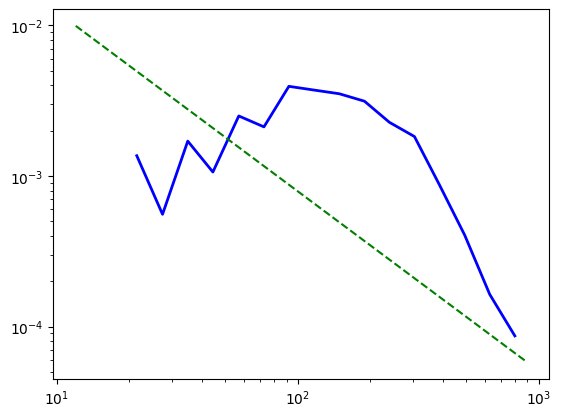

In [106]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence, xmin=1) 
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
print("lambda found:",fit.alpha)
print("k found:",fit.xmin)

<AxesSubplot: >

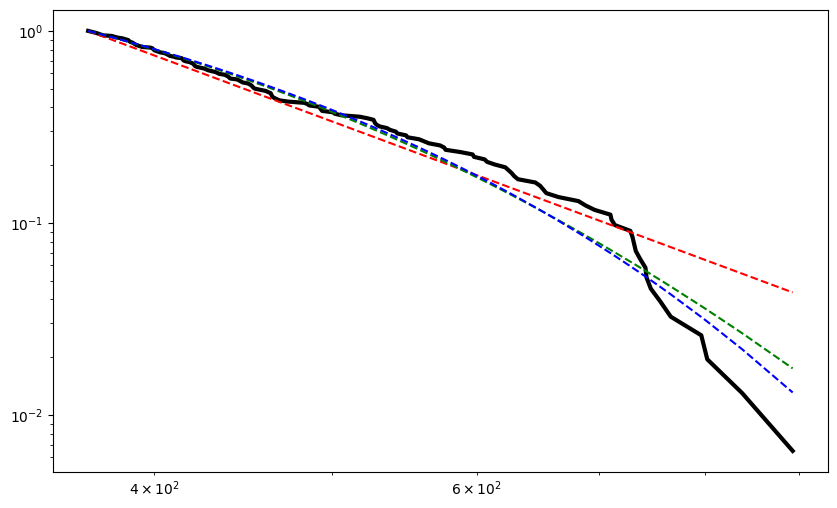

In [103]:
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--') #stretched_exponential

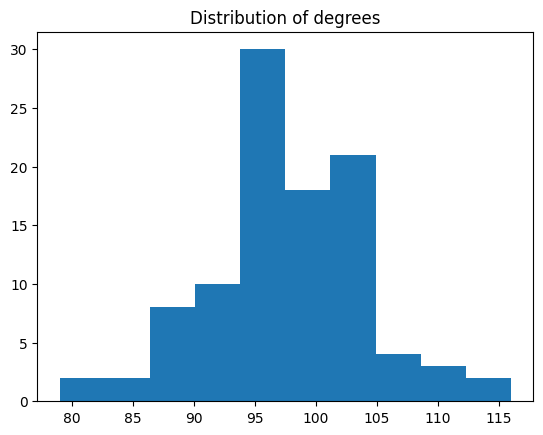

In [104]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title("Distribution of degrees")
    plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

/tmp/ipykernel_225/126105259.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(degrees[m:], degree_freq[m:],'go-',linestyle='None')


Text(0, 0.5, 'Frequency')

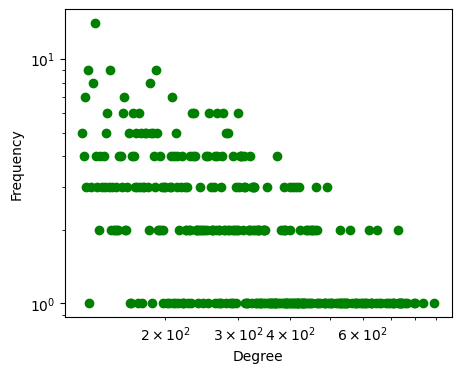

In [105]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
m=126
plt.figure(figsize=(5,4)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-',linestyle='None') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

### Next possible steps
- Run community detection and compute the _Network community profile_